In [4]:
!pip install gseapy
!pip install pandas


[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [39]:
import gseapy as gp
import pandas as pd

In [40]:
gene_list = pd.read_csv("/Users/devammondal/PycharmProjects/GSEAAnalysis/gene_list.tsv", header=None)
gene_list.head()

,0
0,IGKV4-1
1,CD55
2,IGKC
3,PPFIBP1
4,ABHD4


In [41]:
gene_list

,0
0,IGKV4-1
1,CD55
2,IGKC
3,PPFIBP1
4,ABHD4
...,...
851,FAM107A
852,ATRX
853,MEGF9
854,RSU1


In [42]:
enr = gp.enrichr(gene_list=gene_list, # or "./tests/data/gene_list.tsv",
                 gene_sets=['MSigDB_Hallmark_2020','KEGG_2021_Human'],
                 organism='human', # don't forget to set organism to the one you desired! e.g. Yeast
                 outdir=None, # don't write to disk
                )

In [43]:
#Gets sample data from experiments that alter expression levels of those genes (calculates enrichment based off of that), returns p-values for the gene-sets requested. See graphic here: https://gseapy.readthedocs.io/en/latest/introduction.html.
enr.results

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
0,MSigDB_Hallmark_2020,IL-6/JAK/STAT3 Signaling,19/87,1.197225e-09,5.986123e-08,0,0,6.844694,140.612324,IL4R;TGFB1;IL1R1;IFNGR1;IL10RB;ITGB3;IFNGR2;IL...
1,MSigDB_Hallmark_2020,TNF-alpha Signaling via NF-kB,27/200,3.220898e-08,5.368163e-07,0,0,3.841568,66.270963,BTG2;BCL2A1;PLEK;IRS2;LITAF;IFIH1;PANX1;DRAM1;...
2,MSigDB_Hallmark_2020,Complement,27/200,3.220898e-08,5.368163e-07,0,0,3.841568,66.270963,FCN1;LRP1;PLEK;LIPA;CA2;CASP3;LAMP2;S100A12;FY...
3,MSigDB_Hallmark_2020,Inflammatory Response,24/200,1.635890e-06,2.044862e-05,0,0,3.343018,44.540108,LYN;IFITM1;BTG2;IL4R;CD82;IL1R1;IFNGR2;ITGB3;F...
4,MSigDB_Hallmark_2020,heme Metabolism,23/200,5.533816e-06,5.533816e-05,0,0,3.181358,38.509172,SLC22A4;MPP1;BNIP3L;BTG2;ARHGEF12;NEK7;GDE1;FO...
...,...,...,...,...,...,...,...,...,...,...
326,KEGG_2021_Human,RNA transport,3/186,9.809203e-01,9.950561e-01,0,0,0.391159,0.007535,NUP98;PABPC1;MAGOHB
327,KEGG_2021_Human,Protein digestion and absorption,1/103,9.852351e-01,9.950561e-01,0,0,0.234337,0.003486,MME
328,KEGG_2021_Human,Ribosome biogenesis in eukaryotes,1/108,9.879739e-01,9.950561e-01,0,0,0.223328,0.002702,GNL3L
329,KEGG_2021_Human,Neuroactive ligand-receptor interaction,6/341,9.940573e-01,9.976075e-01,0,0,0.425542,0.002536,HRH2;FPR1;LPAR1;LPAR2;F2RL1;FPR2


In [49]:
rnk = pd.read_csv("/Users/devammondal/PycharmProjects/GSEAAnalysis/temp.rank", header=None, index_col=0, sep="\t")
rnk

,1
0,
ATXN1,16.456753
UBQLN4,13.989493
CALM1,13.745533
DLG4,12.796588
MRE11A,12.787631
...,...
OR8B3,0.000000
ZNF845,0.000000
OR5T1,0.000000


In [50]:
#Ranking algorithm
pre_res = gp.prerank(rnk=rnk, # or rnk = rnk,
                     gene_sets='KEGG_2016',
                     threads=4,
                     min_size=5,
                     max_size=1000,
                     permutation_num=1000, # reduce number to speed up testing
                     outdir=None, # don't write to disk
                     seed=6,
                     verbose=True, # see what's going on behind the scenes
                    )


2024-09-14 21:57:20,328 [WARNING] Duplicated values found in preranked stats: 4.97% of genes
The order of those genes will be arbitrary, which may produce unexpected results.
2024-09-14 21:57:20,331 [INFO] Parsing data files for GSEA.............................
2024-09-14 21:57:20,332 [INFO] Enrichr library gene sets already downloaded in: /Users/devammondal/.cache/gseapy, use local file
2024-09-14 21:57:20,350 [INFO] 0001 gene_sets have been filtered out when max_size=1000 and min_size=5
2024-09-14 21:57:20,351 [INFO] 0292 gene_sets used for further statistical testing.....
2024-09-14 21:57:20,351 [INFO] Start to run GSEA...Might take a while..................
2024-09-14 21:57:27,006 [INFO] Congratulations. GSEApy runs successfully................



In [52]:
pre_res.res2d.head(5)

,Name,Term,ES,NES,NOM p-val,FDR q-val,FWER p-val,Tag %,Gene %,Lead_genes
0,prerank,Adherens junction Homo sapiens hsa04520,0.784625,1.912548,0.0,0.0,0.0,47/74,10.37%,CTNNB1;EGFR;RAC1;TGFBR1;SMAD4;MET;EP300;CDC42;...
1,prerank,Glioma Homo sapiens hsa05214,0.784678,1.906706,0.0,0.0,0.0,52/65,16.29%,CALM1;GRB2;EGFR;PRKCA;KRAS;HRAS;TP53;MAPK1;PRK...
2,prerank,Estrogen signaling pathway Homo sapiens hsa04915,0.766347,1.897957,0.0,0.0,0.0,74/99,16.57%,CALM1;PRKACA;GRB2;SP1;EGFR;KRAS;HRAS;HSP90AB1;...
3,prerank,Thyroid hormone signaling pathway Homo sapiens...,0.7577,1.891815,0.0,0.0,0.0,84/118,16.29%,CTNNB1;PRKACA;PRKCA;KRAS;NOTCH1;EP300;CREBBP;H...
4,prerank,Long-term potentiation Homo sapiens hsa04720,0.778249,1.888739,0.0,0.0,0.0,42/66,9.01%,CALM1;PRKACA;PRKCA;KRAS;EP300;CREBBP;HRAS;PRKA...


In [53]:
from gseapy import enrichment_map
# return two dataframe
nodes, edges = enrichment_map(pre_res.res2d)

/Users/devammondal/PycharmProjects/GSEAAnalysis/.venv/lib/python3.12/site-packages/gseapy/plot.py:694: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df[self.colname].replace(
/Users/devammondal/PycharmProjects/GSEAAnalysis/.venv/lib/python3.12/site-packages/gseapy/plot.py:694: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[self.colname].replace(


In [57]:
import networkx as nx
G = nx.from_pandas_edgelist(edges,
                            source='src_idx',
                            target='targ_idx',
                            edge_attr=['jaccard_coef', 'overlap_coef', 'overlap_genes'])

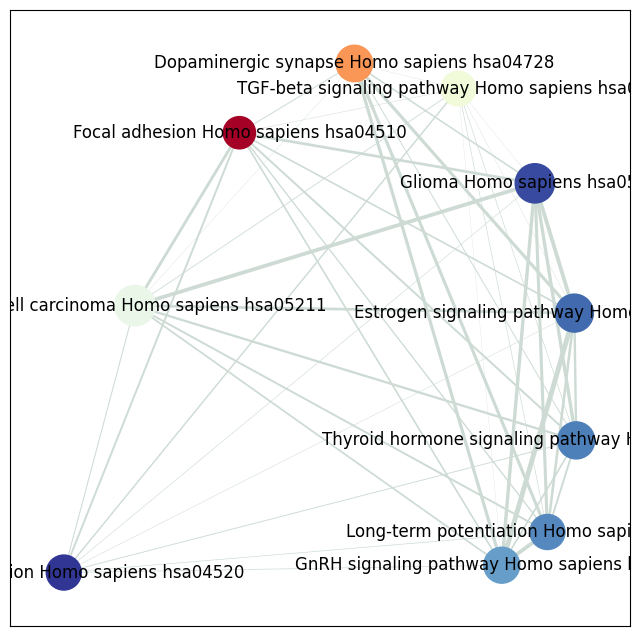

In [87]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots(figsize=(8, 8))

# init node cooridnates
pos=nx.layout.spiral_layout(G)
#node_size = nx.get_node_attributes()
# draw node
nodeColors = list(nodes.NES)
nx.draw_networkx_nodes(G,
                       pos=pos,
                       cmap=plt.cm.RdYlBu,
                       node_color=list(nodes.NES % 10),
                 
                       node_size=list(nodes.Hits_ratio *1000))

nodeLabels = list(nodes.Term.to_dict())
# draw node label
nx.draw_networkx_labels(G,
                        pos=pos,
                        labels=nodes.Term.to_dict())
# draw edge
edge_weight = nx.get_edge_attributes(G, 'jaccard_coef').values()
nx.draw_networkx_edges(G,
                       pos=pos,
                       width=list(map(lambda x: x*10, edge_weight)),
                       edge_color='#CDDBD4')
plt.show()

Now, utilize langchain to provide cluster summaries.

In [81]:
!pip install scikit-learn

  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/54/1a/7deb52fa23aebb855431ad659b3c6a2e1709ece582cb3a63d66905e735fe/scikit_learn-1.5.2-cp312-cp312-macosx_12_0_arm64.whl.metadata
  Obtaining dependency information for joblib>=1.2.0 from https://files.pythonhosted.org/packages/91/29/df4b9b42f2be0b623cbd5e2140cafcaa2bef0759a00b7b70104dcfe2fb51/joblib-1.4.2-py3-none-any.whl.metadata
  Obtaining dependency information for threadpoolctl>=3.1.0 from https://files.pythonhosted.org/packages/4b/2c/ffbf7a134b9ab11a67b0cf0726453cedd9c5043a4fe7a35d1cefa9a1bcfb/threadpoolctl-3.5.0-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.0/11.0 MB 9.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.8/301.8 kB 6.3 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: pip install --upgrade pip


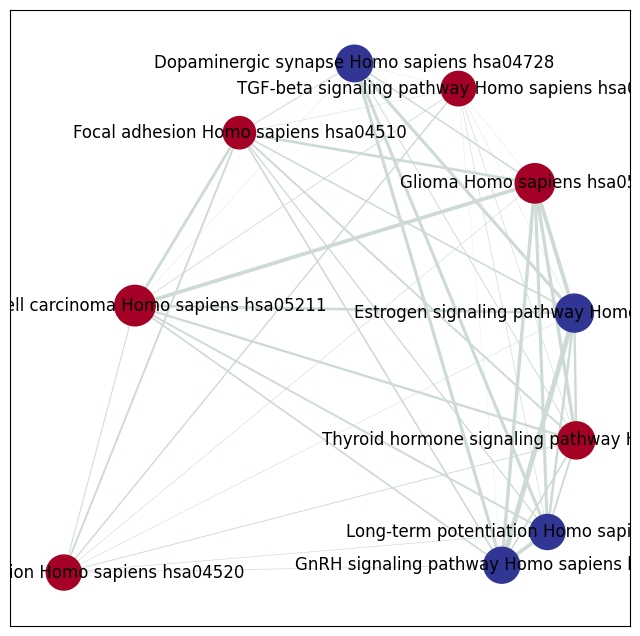

In [91]:
import networkx as nx
from networkx.algorithms import community

# Generate communities using the greedy modularity maximization algorithm
communities = community.greedy_modularity_communities(G, weight='jaccard_coef')

# Convert to a dictionary for color coding nodes based on clusters
community_mapping = {}
for i, community in enumerate(communities):
    for node in community:
        community_mapping[node] = i

# Assign community clusters as node color
node_colors = [community_mapping[node] for node in G.nodes]

# Re-draw graph with community clusters as node colors
fig, ax = plt.subplots(figsize=(8, 8))
nx.draw_networkx_nodes(G,
                       pos=pos,
                       cmap=plt.cm.RdYlBu,
                       node_color=node_colors,  # Use community color for each node
                       node_size=list(nodes.Hits_ratio * 1000))

nx.draw_networkx_labels(G, pos=pos, labels=nodes.Term.to_dict())
nx.draw_networkx_edges(G,
                       pos=pos,
                       width=list(map(lambda x: x * 10, edge_weight)),
                       edge_color='#CDDBD4')

plt.show()


In [143]:
responses = []
results = nodes.Term.to_dict()
for i, community in enumerate(communities):
    l = [s for s in community]
    response = []
    for node in l:
        response.append(results[node])
    responses.append(response)

In [144]:
responses

[['Thyroid hormone signaling pathway Homo sapiens hsa04919',
  'Glioma Homo sapiens hsa05214',
  'TGF-beta signaling pathway Homo sapiens hsa04350',
  'Focal adhesion Homo sapiens hsa04510',
  'Renal cell carcinoma Homo sapiens hsa05211',
  'Adherens junction Homo sapiens hsa04520'],
 ['GnRH signaling pathway Homo sapiens hsa04912',
  'Long-term potentiation Homo sapiens hsa04720',
  'Estrogen signaling pathway Homo sapiens hsa04915',
  'Dopaminergic synapse Homo sapiens hsa04728']]

In [146]:
!pip install langchain
!pip install langchain_community
!pip install langchain_openai


[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: pip install --upgrade pip
  Obtaining dependency information for langchain_community from https://files.pythonhosted.org/packages/07/3d/a30549f1c5fa023b833a81eab43f99d6f603bed5ecfaef175f53e7166dbf/langchain_community-0.3.0-py3-none-any.whl.metadata
  Obtaining dependency information for dataclasses-json<0.7,>=0.5.7 from https://files.pythonhosted.org/packages/c3/be/d0d44e092656fe7a06b55e6103cbce807cdbdee17884a5367c68c9860853/dataclasses_json-0.6.7-py3-none-any.whl.metadata
  Obtaining dependency information for pydantic-settings<3.0.0,>=2.4.0 from https://files.pythonhosted.org/packages/29/8d/29e82e333f32d9e2051c10764b906c2a6cd140992910b5f49762790911ba/pydantic_settings-2.5.2-py3-none-any.whl.metadata
  Obtaining dependency information for marshmallow<4.0.0,>=3.18.0 from https://files.pythonhosted.org/packages/3c/78/c1de55eb3311f2c200a8b91724414b8d6f5ae78891c15d9d936ea43c3dba/marshmallow-3.22.0-py3-non

In [163]:
from langchain_openai import ChatOpenAI
from langchain_community.tools import AIPluginTool
llm = ChatOpenAI(temperature=0, model="gpt-4o", api_key = "")
llm.invoke(f"Given the following set of genes, identify and note down specific overlapping genes and overall functionalities of the gene sets in a cohesive, half a page long paragraph with paragraph citations: {responses[0]}")

AIMessage(content='The given set of genes encompasses various pathways and mechanisms critical to cellular function and disease progression. The "Thyroid hormone signaling pathway" (hsa04919) is essential for regulating metabolism, growth, and development in Homo sapiens. It intersects with the "TGF-beta signaling pathway" (hsa04350), which plays a pivotal role in cell growth, differentiation, and apoptosis, and is often implicated in cancer and fibrosis. Both pathways can influence the "Focal adhesion" (hsa04510) pathway, which is crucial for cell movement, survival, and proliferation by mediating the interaction between cells and the extracellular matrix. This pathway is also linked to the "Adherens junction" (hsa04520), which maintains cell-cell adhesion and tissue integrity, highlighting their collective role in maintaining cellular architecture and signaling.\n\nIn the context of diseases, the "Glioma" (hsa05214) and "Renal cell carcinoma" (hsa05211) pathways illustrate the involv